# A Data-Driven Study on How Extracurricular Activities Influence Gpa and Mental Well-being

### A Mini Project - Data Analytics BSMS 1306
Prepared by :  
- Nur Anis Saffiya binti Mohd Diah (2411296)
- Farah Nur Sabrina binti Mohamad Ares (2418326)



## Objective

The objective of this project is to explore the impact of extracurricular activities on students academic performance (GPA) and overall well-being.

Specifically, we aim to:
- Analyze the relationship between types of extracurricular activities and GPA.
- Evaluate how different levels of involvement affect students well-being scores.
- To identify which types of extracurricular activities are most beneficial to student well-being.

In [138]:
import pandas as pd

In [139]:
import seaborn as sns

In [140]:
import numpy as np

In [141]:
import streamlit as st

In [142]:
%matplotlib inline

In [143]:
import matplotlib.pyplot as plt

In [144]:
import plotly.express as px

In [145]:
df=pd.read_csv("impact_of_extracurricular_activites_on_academic_performance_of_students.csv")

### Dataframe of Students Activity and Well-being

In [147]:
print(df)

    Student_ID     Extracurricular_Activity   GPA  Wellbeing_Score
0        S0001   Volunteer Work (Low Hours)  2.78              5.8
1        S0002      Sports (High Intensity)  3.43              6.2
2        S0003      Sports (High Intensity)  2.44              5.0
3        S0004   Volunteer Work (Low Hours)  3.13              6.3
4        S0005     Clubs (High Involvement)  2.88              6.3
..         ...                          ...   ...              ...
995      S0996       Sports (Low Intensity)  3.21              6.8
996      S0997   Volunteer Work (Low Hours)  2.00              8.0
997      S0998  Volunteer Work (High Hours)  3.19              9.7
998      S0999   Volunteer Work (Low Hours)  3.53              6.6
999      S1000     Clubs (High Involvement)  4.00              8.1

[1000 rows x 4 columns]


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   object 
 1   Extracurricular_Activity  857 non-null    object 
 2   GPA                       1000 non-null   float64
 3   Wellbeing_Score           1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [149]:
# To identify and clean missing values

In [150]:
df.replace('',np.nan, inplace=True)

In [151]:
print(df.isnull().sum())

Student_ID                    0
Extracurricular_Activity    143
GPA                           0
Wellbeing_Score               0
dtype: int64


In [152]:
# Replace '' to 'unknown' for python to read missing values

In [153]:
df['Extracurricular_Activity']=df['Extracurricular_Activity'].fillna('unknown')

In [154]:
print(df.isnull().sum())

Student_ID                  0
Extracurricular_Activity    0
GPA                         0
Wellbeing_Score             0
dtype: int64


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   object 
 1   Extracurricular_Activity  1000 non-null   object 
 2   GPA                       1000 non-null   float64
 3   Wellbeing_Score           1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [156]:
df.describe()

,GPA,Wellbeing_Score
count,1000.000000,1000.000000
mean,2.995700,7.232100
std,0.480807,1.333934
min,2.000000,3.000000
25%,2.657500,6.300000
50%,3.000000,7.200000
75%,3.340000,8.100000
max,4.000000,10.000000


In [157]:
# Identifying any outliers in GPA score

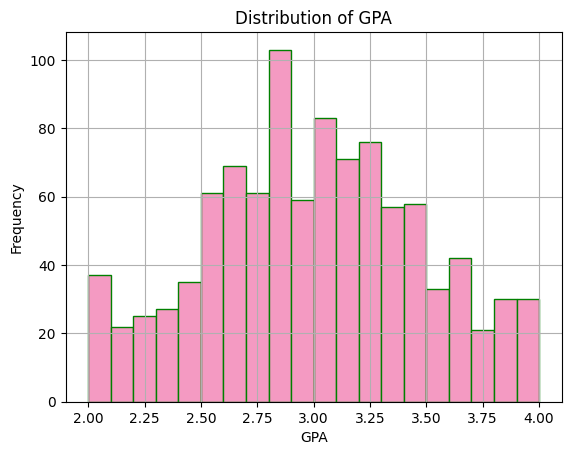

In [158]:
df['GPA'].hist(bins=20, color="#F49AC2", edgecolor='green')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.show()

In [159]:
print(df['Student_ID'])

0      S0001
1      S0002
2      S0003
3      S0004
4      S0005
       ...  
995    S0996
996    S0997
997    S0998
998    S0999
999    S1000
Name: Student_ID, Length: 1000, dtype: object


In [160]:
# To identidy duplicate data

In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
# Renaming data in simpler name

In [163]:
df=df.rename(columns={
    'Extracurricular_Activity':'Activity',
    'Wellbeing_Score':'Well-being'
})

In [164]:
# Save cleaned data in form .csv in folder

In [165]:
df.to_csv('anissabrinacleaned_data.csv',index=False)


In [166]:
import pandas as pd

In [167]:
import matplotlib.pyplot as plt

In [168]:
import seaborn as sns

In [169]:
df= pd.read_csv('anissabrinacleaned_data.csv')

In [170]:
# To calculate the average GPA 

In [171]:
df_avg = df.groupby('Activity')['GPA'].mean()


### Objective 1 : Analyze the relationship between types of extracurricular activities and GPA.

In [173]:
# This pie chart shows sum of the average GPA contribution by each type of extracurricular activity. 
# By visualizing it this way, we can see which activities are associated with higher or lower academic performance.

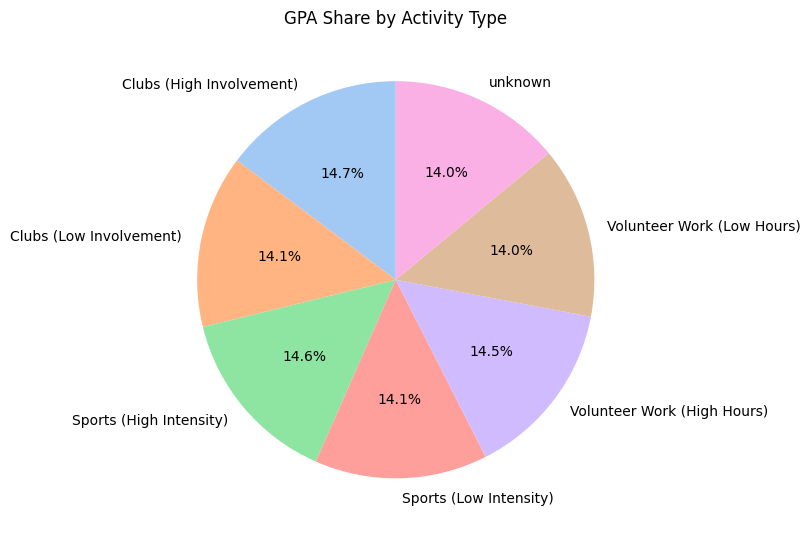

In [174]:
df_avg = df.groupby('Activity')['GPA'].mean()
df_avg.plot.pie(autopct='%1.1f%%', 
                figsize=(8,8), 
                startangle=90, 
                colors=sns.color_palette('pastel'), 
                ylabel='')

plt.title("GPA Share by Activity Type")
plt.tight_layout()
plt.show()

In [175]:
# Based on pie chart above, among the different types of extracurricular activities, Clubs with high involvement accounts for the largest share of the average GPA sum, suggesting students in this activity tend to have relatively higher academic performance.  

In [176]:
print(df.groupby('Activity')['GPA'].mean().sort_values(ascending=True))

Activity
Volunteer Work (Low Hours)     2.934156
unknown                        2.937622
Sports (Low Intensity)         2.952416
Clubs (Low Involvement)        2.955714
Volunteer Work (High Hours)    3.051522
Sports (High Intensity)        3.060138
Clubs (High Involvement)       3.093282
Name: GPA, dtype: float64


In [177]:
# This is clearer chart to see which activity can improve students GPA. 

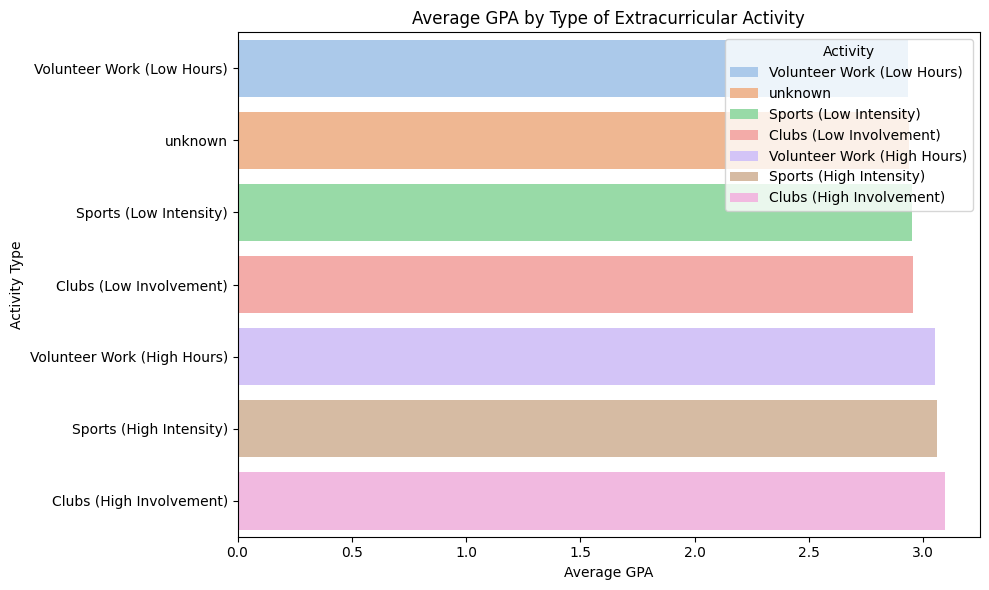

In [178]:
avg_gpa_by_activity = df.groupby('Activity')['GPA'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_gpa_by_activity.values, y=avg_gpa_by_activity.index, hue=avg_gpa_by_activity.index, legend=True, palette="pastel")
plt.title("Average GPA by Type of Extracurricular Activity")
plt.xlabel("Average GPA")
plt.ylabel("Activity Type")
plt.tight_layout()
plt.show()


In [179]:
# From the bar chart above, we can see that students who are actively involved in clubs have the highest average GPA compared to those in other extracurricular activities. The average GPA for students in other activity types shows smaller differences between them.

### Objective 2 : Evaluate how different levels of involvement affect students well-being scores.

In [181]:
# Chart shows level of Involvement in extracurricular activities affects student well-being and academic performance. 
# To analyze either high or low involvement in curricular activities improve students wellbeing and GPA.

In [182]:
# Adding another column to see level of Involvement either it is high or low
df['Involvement_Level'] = df['Activity'].astype(object).apply(lambda x: x.upper())

print(df.head())


  Student_ID                    Activity   GPA  Well-being  \
0      S0001  Volunteer Work (Low Hours)  2.78         5.8   
1      S0002     Sports (High Intensity)  3.43         6.2   
2      S0003     Sports (High Intensity)  2.44         5.0   
3      S0004  Volunteer Work (Low Hours)  3.13         6.3   
4      S0005    Clubs (High Involvement)  2.88         6.3   

            Involvement_Level  
0  VOLUNTEER WORK (LOW HOURS)  
1     SPORTS (HIGH INTENSITY)  
2     SPORTS (HIGH INTENSITY)  
3  VOLUNTEER WORK (LOW HOURS)  
4    CLUBS (HIGH INVOLVEMENT)  


In [183]:
print(df.tail())

    Student_ID                     Activity   GPA  Well-being  \
995      S0996       Sports (Low Intensity)  3.21         6.8   
996      S0997   Volunteer Work (Low Hours)  2.00         8.0   
997      S0998  Volunteer Work (High Hours)  3.19         9.7   
998      S0999   Volunteer Work (Low Hours)  3.53         6.6   
999      S1000     Clubs (High Involvement)  4.00         8.1   

               Involvement_Level  
995       SPORTS (LOW INTENSITY)  
996   VOLUNTEER WORK (LOW HOURS)  
997  VOLUNTEER WORK (HIGH HOURS)  
998   VOLUNTEER WORK (LOW HOURS)  
999     CLUBS (HIGH INVOLVEMENT)  


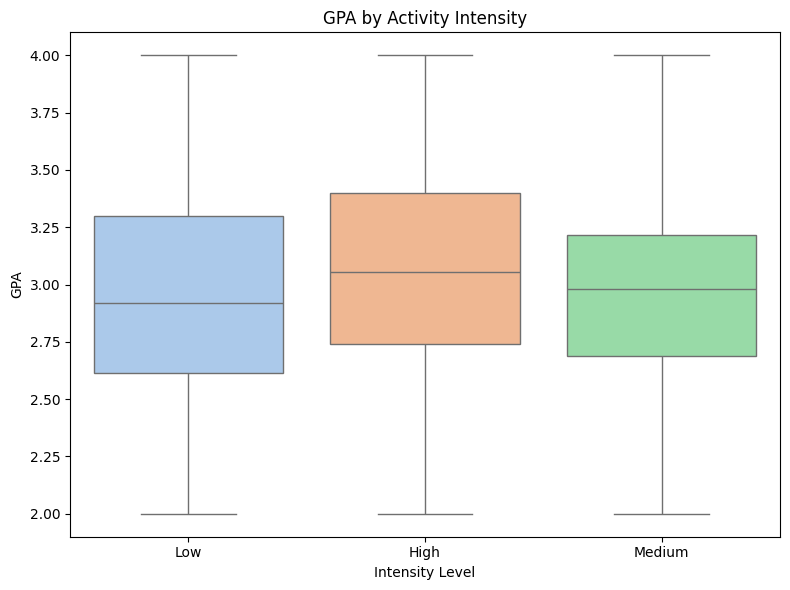

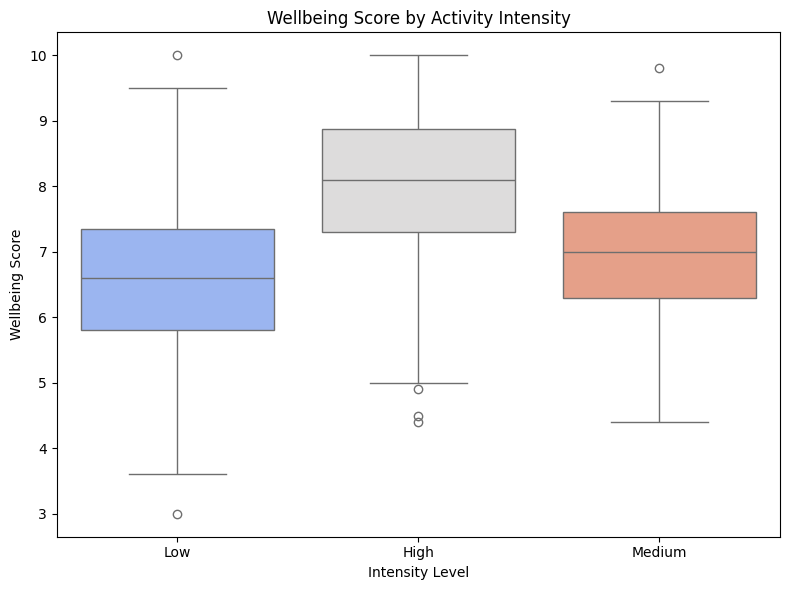

In [184]:
def get_intensity(activity):
    if "High" in activity:
        return "High"
    elif "Low" in activity:
        return "Low"
    else:
        return "Medium"

df["Intensity_Level"] = df["Activity"].apply(get_intensity)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Intensity_Level", y="GPA", data=df, hue="Intensity_Level", palette="pastel", legend=False )
plt.title("GPA by Activity Intensity")
plt.xlabel("Intensity Level")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Intensity_Level", y="Well-being", data=df, hue="Intensity_Level", palette="coolwarm", legend=False)
plt.title("Wellbeing Score by Activity Intensity")
plt.xlabel("Intensity Level")
plt.ylabel("Wellbeing Score")
plt.tight_layout()
plt.show()

In [185]:
# First box plot show students with high-intensity involvement tend to have slightly higher GPA than those in medium or low-intensity activities, while students in low-intensity activities may have more varied GPA outcomes.
# The spread (IQR) is also narrower for the high group, suggesting more consistent academic performance among those students.

# Second box plot show students with high-intensity involvement also tend to report higher well-being score, while Low-intensity participants generally have lower well-being and a wider range of scores, suggesting more fluctuation or inconsistency.
# The median well-being score is clearly higher for the High Intensity Level group compared to Medium and Low.

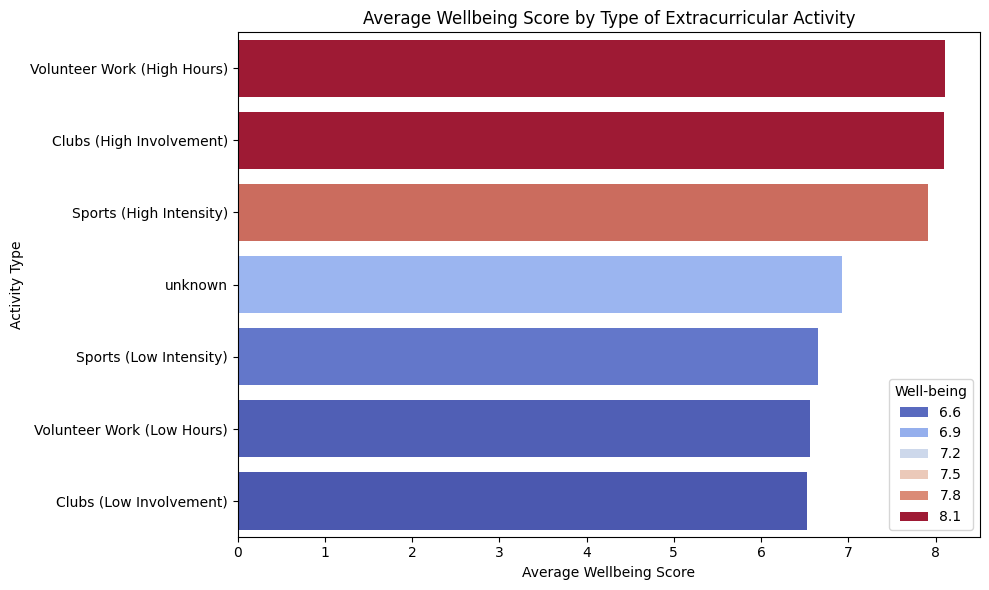

In [186]:
# Group by activity type and calculate average wellbeing
df_avg_wellbeing = df.groupby('Activity')['Well-being'].mean().reset_index()

# Sort by wellbeing score 
df_avg_wellbeing = df_avg_wellbeing.sort_values(by='Well-being', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_avg_wellbeing, x="Well-being", y="Activity", hue="Well-being", palette="coolwarm")

# Titles and labels
plt.title("Average Wellbeing Score by Type of Extracurricular Activity")
plt.xlabel("Average Wellbeing Score")
plt.ylabel("Activity Type")
plt.tight_layout()
plt.show()


In [187]:
# The bar chart shows activity with high involvement and intensity (more active students) improved students well-being rather than low involvement.

### Objective 3 : To identify which types of extracurricular activities are most beneficial to student well-being.

In [189]:
# Explore the correlation between academic performance and student wellbeing. 
# This will allow for more targeted support and encouragement of the most effective activities, helping students achieve a better balance between academic performance and personal well-being.

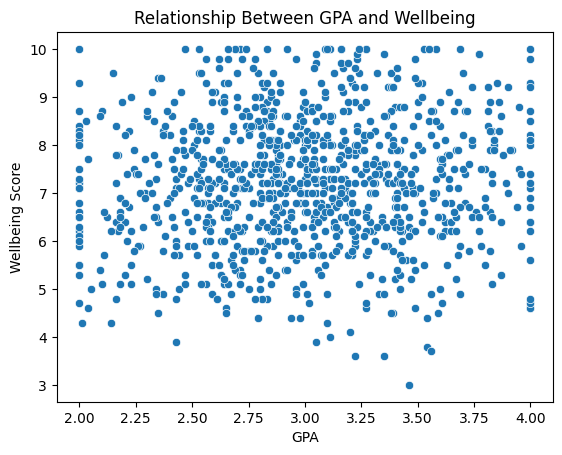

Correlation coefficient: 0.06399336434912495


In [190]:
sns.scatterplot(data=df, x='GPA', y='Well-being')
plt.title("Relationship Between GPA and Wellbeing")
plt.xlabel("GPA")
plt.ylabel("Wellbeing Score")

plt.show()
correlation = df['GPA'].corr(df['Well-being'])
print("Correlation coefficient:", correlation)

In [191]:
# Shows average well-being score for each activity type
# Shows the highest average well-being
avg_wellbeing = df.groupby('Activity')['Well-being'].mean().sort_values(ascending=False)
print(avg_wellbeing)

Activity
Volunteer Work (High Hours)    8.104348
Clubs (High Involvement)       8.098473
Sports (High Intensity)        7.909655
unknown                        6.927972
Sports (Low Intensity)         6.648993
Volunteer Work (Low Hours)     6.558442
Clubs (Low Involvement)        6.532143
Name: Well-being, dtype: float64


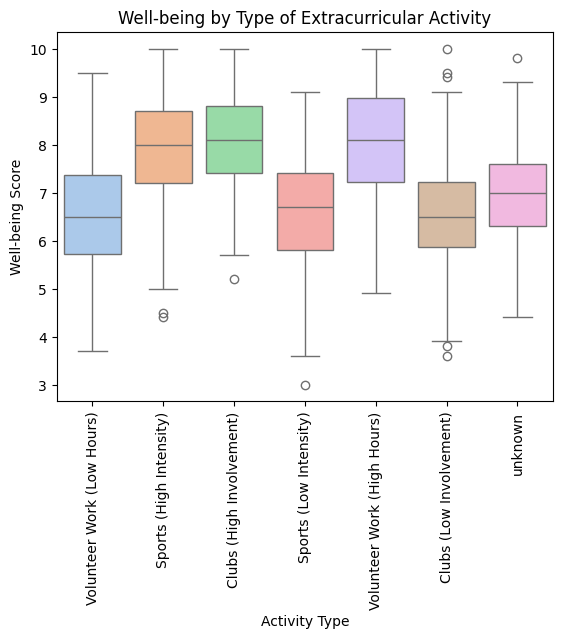

In [192]:
sns.boxplot(data=df, x='Activity', y='Well-being', hue='Activity', palette='pastel')
plt.title("Well-being by Type of Extracurricular Activity")
plt.xlabel("Activity Type")
plt.ylabel("Well-being Score")
plt.xticks(rotation=90)  
plt.show()

In [193]:
# This box plot show Clubs activities improved students well-being as the well-being score for clubs is highest than volunteer work and sports.

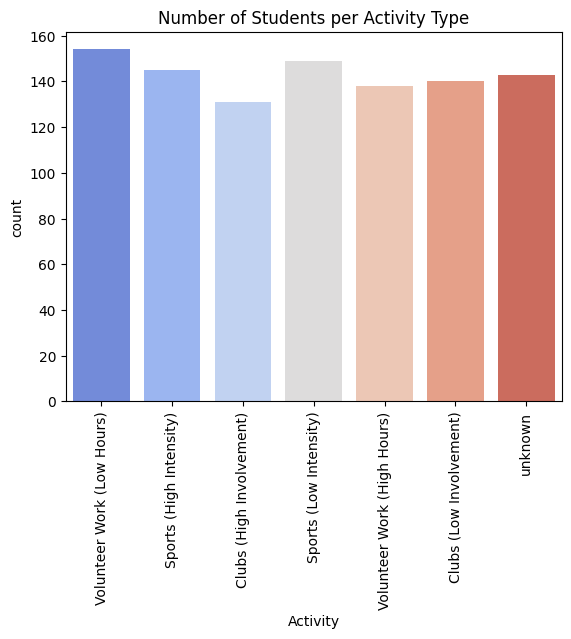

In [194]:
# To check the sample size for each category, to know which groups have strong or weak data and improves the reliability and validity of the findings.
sns.countplot(data=df, x='Activity', hue='Activity',palette='coolwarm')
plt.title("Number of Students per Activity Type")
plt.xticks(rotation=90)
plt.show()

In [195]:
# The bar chart above show how many students involved in each activities.

### Conclusions

#### To sum up, all three objectives of this mini project were successfully analyzed. The study revealed meaningful insights into how extracurricular activities impact students academic performance (GPA) and overall well-being. We found that different types of activities relate differently to GPA, levels of involvement influence well-being scores, and certain activities—such as clubs, volunteering and sports—are especially beneficial for student well-being. These findings highlight the importance of encouraging balanced and meaningful participation in extracurricular programs to support both academic success and personal development.